# Questão 01

In [12]:
# student_integral_image_numpy.py

import numpy as np

def sum_s_image(n, m, image):
    total = 0

    for i in range (0, n + 1):
        for j in range(0, m + 1):
            total += image[i,j]

    #print(total)

    return np.float64(total)

def compute_integral_image(image: np.ndarray) -> np.ndarray:
    """
    Computes the integral image using NumPy.

    Parameters:
        image (np.ndarray): 2D grayscale image.

    Returns:
        np.ndarray: Integral image.
    """
    # TODO: Implement your solution here

    img_res = np.zeros((3,3), dtype=np.float64)

    for y in range(len(image)):
        for x in range (len(image[0])):
            img_res[y, x] = sum_s_image(y, x, image)

    return img_res

# Define test image
image = np.array([
    [0.32285394, 0.95322289, 0.31806831],
    [0.12936134, 0.45275244, 0.60094833],
    [0.71811803, 0.49059312, 0.38843348],
], dtype=np.float64)

expected_result = np.array([
    [0.32285394, 1.27607683, 1.59414514],
    [0.45221528, 1.85819061, 2.77720725],
    [1.17033331, 3.06690176, 4.37435188],
], dtype=np.float64)

integral_image = compute_integral_image(image)

if (expected_result == integral_image).all():
    print(f'Success!')
else:
    print("erroe")

print(f'Original image: \n{image}\n')
print(f'Expected result: \n{expected_result}\n')
print(f'Your result: \n{integral_image}\n')

erroe
Original image: 
[[0.32285394 0.95322289 0.31806831]
 [0.12936134 0.45275244 0.60094833]
 [0.71811803 0.49059312 0.38843348]]

Expected result: 
[[0.32285394 1.27607683 1.59414514]
 [0.45221528 1.85819061 2.77720725]
 [1.17033331 3.06690176 4.37435188]]

Your result: 
[[0.32285394 1.27607683 1.59414514]
 [0.45221528 1.85819061 2.77720725]
 [1.17033331 3.06690176 4.37435188]]



# Questão 02

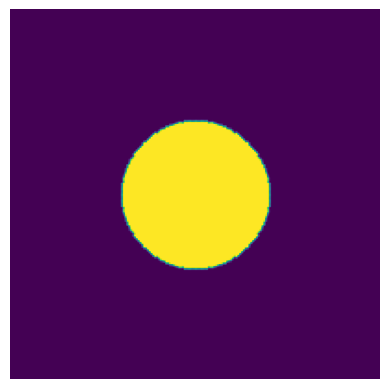

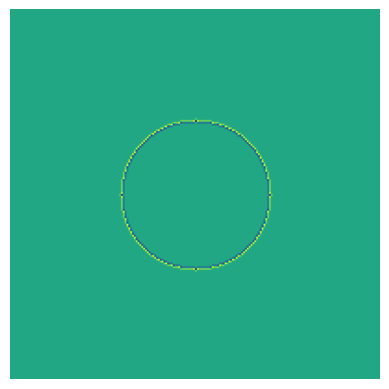

Correlation coefficient: 0.9621492663463032


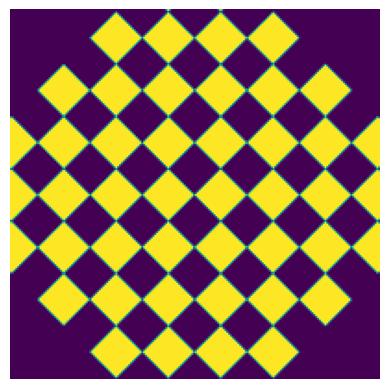

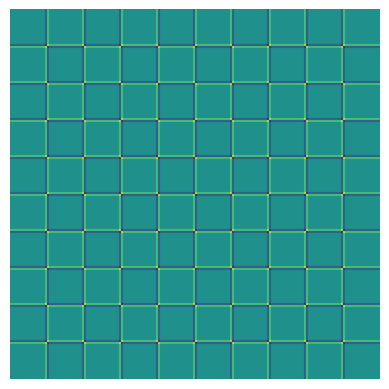

Correlation coefficient: 0.9383739474511792


0.9383739474511792

In [15]:

import cv2 as cv
import numpy as np

def rotation_with_angle(img, angle = 45):

    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)

    m = cv.getRotationMatrix2D(center, angle, 1.0)

    img_rotation = cv.warpAffine(img, m, (w, h))

    return img_rotation

def verify_laplacian_isotropy(image_path, angle=45):
    """
    Aplica rotação + Laplaciano e Laplaciano + rotação na imagem de entrada
    e retorna o coeficiente de correlação de Pearson entre os dois resultados.

    Parâmetros:
        image_path (str): Caminho para a imagem em tons de cinza.
        angle (float): Ângulo de rotação em graus.

    Retorno:
        float: Coeficiente de correlação de Pearson entre as duas imagens.
    """
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # TODO: Implementar solução aqui    
    img1 = rotation_with_angle(image, angle)
    img2 = cv.Laplacian(image, cv.CV_64F)


    result_1 = cv.Laplacian(img1, cv.CV_64F)
    result_2 = rotation_with_angle(img2, angle)
    
    
    # Flatten and compute correlation
    corr = np.corrcoef(result_1.flatten(), result_2.flatten())[0, 1]
    print(f'Correlation coefficient: {corr}')
    return corr

verify_laplacian_isotropy('q2/example_image.png', angle=45)
# Expected: Correlation coefficient: 0.9621492663463063

verify_laplacian_isotropy('q2/checkerboard_image.png', angle=45)
# Expected: Correlation coefficient: 0.9383739474511829

# Questão 03

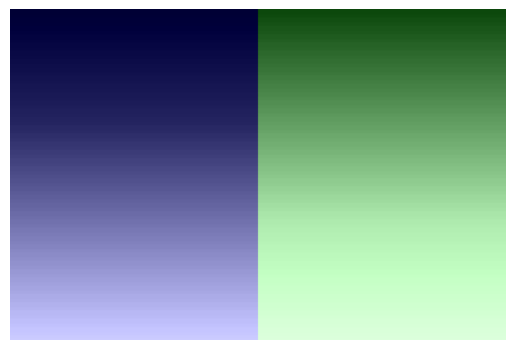

Errado!


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def equalize_histogram(image_path: str) -> np.ndarray:
    """
    Realiza equalização de histograma apenas no canal Y de uma imagem RGB convertida para YCrCb.

    Parâmetros:
        image_path (str): Caminho para a imagem RGB.

    Retorno:
        np.ndarray: Imagem RGB com o canal Y equalizado.
    """
    # TODO: Implemente sua solução aqui

    img = cv.imread(image_path, cv.COLOR_BGR2RGB)
    
    img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
    y, cr, cb = cv.split(img_ycrcb)
    y_equalized = cv.equalizeHist(y)
    img_ycrcb_equalized = cv.merge([y_equalized, cr, cb])
    img_rgb_ycrcb_equalized = cv.cvtColor(img_ycrcb_equalized, cv.COLOR_YCrCb2RGB)

    plt.imshow(img_rgb_ycrcb_equalized)
    plt.axis('Off')
    plt.show()

    return img_rgb_ycrcb_equalized


student_result = equalize_histogram('q3/unequal_lighting_color_image.png')
expected_result = cv.imread('q3/expected_result.png')

if (expected_result == student_result).all():
    print('Success!')
else:
    print('Errado!')